# Examples
We will now perform our first predictions. Consider [this data set](https://drive.google.com/file/d/13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d/view?usp=sharing) which tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Our aim will be to predict one's chance of getting into grad school. Let's begin by taking a look at the data


In [2]:
import numpy as np
import pandas as pd

#load the data
data = pd.read_csv('uni_admission.csv')

#displaying the dataset
data.shape

(500, 9)

# New Section

You should see 500 entries, and 9 columns. Let's also get a description of the data

In [3]:
data.describe()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's start by focusing on a single variable: the GRE score 

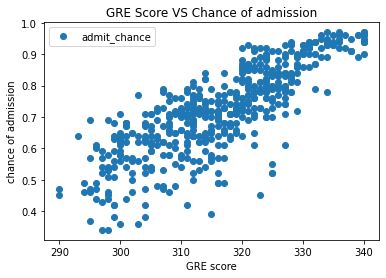

In [4]:
import matplotlib.pyplot as plt

data.plot(x='GRE', y='admit_chance', style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()



We can clearly see that there is a relationship between GRE scores and chances of admission. While there are some outliers, we will now build a linear regression model to predict admission chance based on GRE results. First, we set up our train and test datasets

In [5]:
from sklearn.model_selection import train_test_split

X = data['GRE'].values.reshape(-1, 1)
y = data['admit_chance'].values.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
GRE_train, GRE_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)



This should be familiar so far, time to actually create the model. We will create a regressor object, and train it using our train data

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(GRE_train, admit_train)

#The fit method will look for our optimal line. More info on this method and others
# at the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

[-2.54881269]
[[0.01033718]]


How good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict chances of admission based on those GRE scores we set aside, then compare that to the actual chances from the original dataset.

In [7]:
admit_predict = regressor.predict(GRE_test)

comparison_frame = pd.DataFrame({'Actual': admit_test.flatten(), 'Predicted': admit_predict.flatten()})

comparison_frame.describe()
  

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.706884
std,0.13282,0.115189
min,0.39000,0.500657
25%,0.60000,0.614366
50%,0.70500,0.717738
75%,0.80000,0.800435
max,0.96000,0.945156


Our model is not too bad, although you can see that it can be off, as with the min value. Let's visualize it for a better intuition

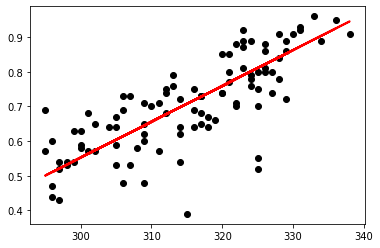

In [8]:
plt.scatter(GRE_test, admit_test, color='black')
plt.plot(GRE_test, admit_predict, color='red', linewidth=2)
plt.show()

We have some outliers, but our line is nicely centered. While visualizations like this are helpful in assessing our line of best fit, sklearn comes with some crucial metrics for linear regressions

In [9]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(admit_test, admit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(admit_test, admit_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(admit_test, admit_predict)))  


Mean Absolute Error: 0.0636984910033071
Mean Squared Error: 0.00726745943092683
Root Mean Squared Error: 0.0852493954871636


How do we make sense of the numbers above? You shoud read through [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) for formal definitions of the metrics above, but bear in mind the following:



*   We will use these metrics (particularly RMSE) to compare models to each other. The lower the value the better.
*   These values are relative to our dependent variable, i.e our dependent variable ranges from 0.39 to 0.96, with a mean of 0.7 and standard deviation of 0.13. This makes an RMSE of 0.085 somewhat acceptable. If our data ranged from 0 to 10, an RMSE of 0.085 would be incredible!

Let's see if we can improve our model by bringing in new independent variables. Let's start by plotting TOEFL scores against admission chance



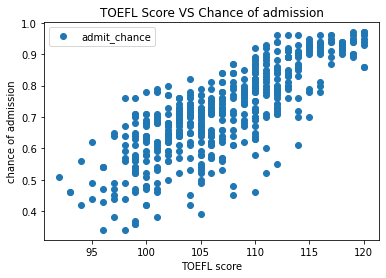

In [10]:
import matplotlib.pyplot as plt

data.plot(x='TOEFL', y='admit_chance', style='o')
plt.title('TOEFL Score VS Chance of admission')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admission')
plt.show()


Once again, we can see that there is a relationship between TOEFL score and chance of admission. Let's perform a multivariate linear regression using both GRE and TOEFL scores as independent variables.

In [17]:
# Preparing the Data

X = data[['GRE', 'TOEFL']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

It is interesting at this point to check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable

In [12]:
regressor.coef_


array([0.00641501, 0.00867603])

In this case, we can see that a single point change in your Toefl score would influence your chances slightly more than a similar 1 point change in GRE scores. 

At this point, let's compare our predicted results to the actual data from the test set:


In [20]:
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.708793
std,0.13282,0.115286
min,0.39000,0.485892
25%,0.60000,0.618885
50%,0.70500,0.701137
75%,0.80000,0.798953
max,0.96000,0.950717


Slight improvements! This should be echoed in our key metrics being smaller than our single variable linear model

In [45]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.4811012381051179
Mean Squared Error: 0.3988479461373774
Root Mean Squared Error: 0.6315440967481031


It is now time for some challenges!

# Challenge 1

Using the same dataset, find out which of the available variables has the largest **weight** in predicting acceptance into university.



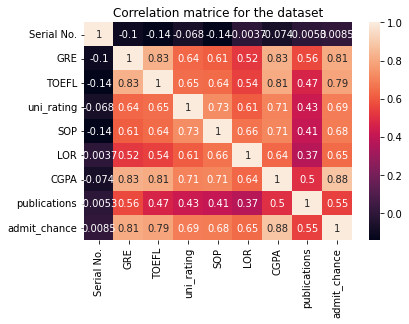

In [22]:
# Heatmap of correlation
import seaborn as sns
corr_matrix = data.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the dataset")

plt.xlabel("")

plt.ylabel("")

plt.show()

# CGPA has the largets weight

# Challenge 2

Take a look at this [dataset](https://drive.google.com/file/d/1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4/view?usp=sharing) on wine quality. You will have to build a multivariate model that predicts the **quality** of the wine, but with a key constraint: you may only use 4 variables from the 11 independent variables available to you. 

How can you pick the 4 most relevant independent variables? recall your learnings from module 1.

Compute your metrics, and compare with your peers. How did each of you achieve their results? 

Hint: recall reduction techniques, you want to pick independent variables that are as unrelated to each other as possible

In [46]:
wine = pd.read_csv('winequality-red.csv')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


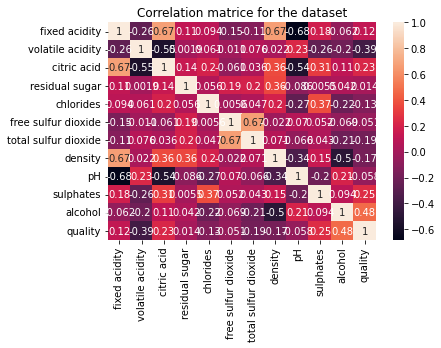

In [47]:
# Heatmap of correlation
corr_matrix = wine.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the dataset")

plt.xlabel("")

plt.ylabel("")

plt.show()

#based on the correlations, will pick the following 4 variables: alcohol (0.48), volatile acidity (0.39), sulphates (0.25) and citric acid (0.23)

In [48]:
# Preparing the Data

X = wine[['alcohol', 'volatile acidity','sulphates','fixed acidity']]
y = wine['quality']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
# coefficients our regressionmodel has chosen
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
alcohol,0.320103
volatile acidity,-1.223024
sulphates,0.622282
fixed acidity,0.027779


In [50]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,6,5.974753
1032,5,4.944443
1002,7,6.485548
487,6,5.276399
979,5,5.829167
...,...,...
794,6,6.600962
813,4,6.044308
1322,5,6.147904
704,4,5.077722


In [52]:
df.describe()

,Actual,Predicted
count,320.000000,320.000000
mean,5.593750,5.668945
std,0.757796,0.482506
min,3.000000,4.574883
25%,5.000000,5.298440
50%,6.000000,5.602151
75%,6.000000,6.028673
max,8.000000,7.021181


In [44]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4811012381051179
Mean Squared Error: 0.3988479461373774
Root Mean Squared Error: 0.6315440967481031
